In [40]:
import pandas as pd
data_path = './data/car_dekho.csv'
car_data = pd.read_csv(data_path)

In [41]:
car_data.head()

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,5,3.35,27000,Petrol,Dealer,Manual
1,sx4,6,4.75,43000,Diesel,Dealer,Manual
2,ciaz,2,7.25,6900,Petrol,Dealer,Manual
3,wagon r,8,2.85,5200,Petrol,Dealer,Manual
4,swift,5,4.60,42450,Diesel,Dealer,Manual


In [42]:
car_data[['Transmission']].head()

,Transmission
0,Manual
1,Manual
2,Manual
3,Manual
4,Manual


In [43]:
print(len(car_data)) #prints the length of car_data

301


<AxesSubplot:xlabel='Age', ylabel='Selling_Price'>

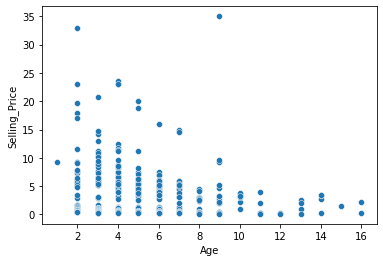

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x ='Age' , y ='Selling_Price', data = car_data)

In [45]:
car_data.groupby("Fuel_Type").count()

,Car_Name,Age,Selling_Price,Kms_Driven,Seller_Type,Transmission
Fuel_Type,,,,,,
CNG,2,2,2,2,2,2
Diesel,60,60,60,60,60,60
Petrol,239,239,239,239,239,239


/Users/seemavora/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


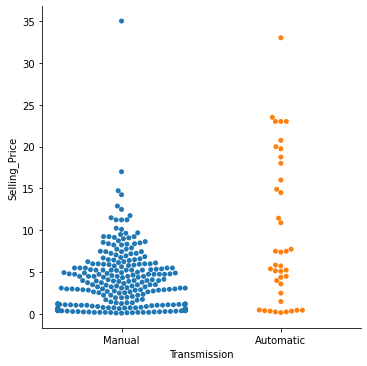

In [46]:
sns.catplot(x = 'Transmission', y = 'Selling_Price', data = car_data, kind ='swarm')

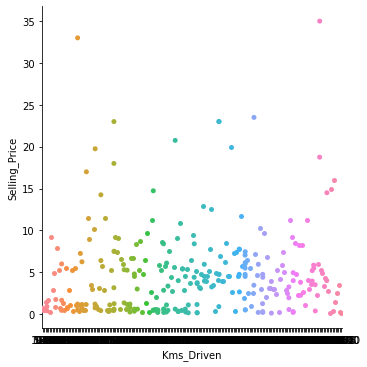

In [47]:
sns.catplot(x='Kms_Driven', y = 'Selling_Price', data = car_data)

In [48]:
from sklearn import linear_model
import numpy as np

x= car_data[['Age']]
y = car_data[["Selling_Price"]]
#setting up the model
linear =linear_model.LinearRegression(fit_intercept=True) 
#fit_intercept : whether or not to use intercept in calculations
linear.fit(x,y) #training the model

LinearRegression()

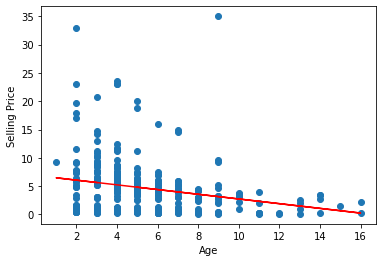

In [49]:
import matplotlib.pyplot as pyplot
y_pred = linear.predict(x)
plt.plot(x, y_pred, color = 'red')

plt.scatter(x,y)
plt.xlabel('Age')
plt.ylabel('Selling Price')
plt.show()


In [50]:
#printing the slope value
print('Our m is the %0.4f lakhs/year'%linear.coef_)
#printing the intercept
print('Our b is %0.4f lakhs'%linear.intercept_)

Our m is the -0.4151 lakhs/year
Our b is 6.8912 lakhs


In [51]:
#in linear regression values need to be numerical
car_data['TransmissionNumber'] = car_data['Transmission'].replace({'Manual':1, 'Automatic':0})
#setting x value
x= car_data[['Age', 'TransmissionNumber', 'Kms_Driven']]
#set up model
multipleLR = linear_model.LinearRegression(fit_intercept= True, normalize=True)
#train the model
multipleLR.fit(x,y)

LinearRegression(normalize=True)

In [52]:
print('Single linear model had an R^2 of: %0.3f'%linear.score(x[['Age']], y))
print('Multiple linear model has R^2 value: %0.4f'%multipleLR.score(x,y))


Single linear model had an R^2 of: 0.056
Multiple linear model has R^2 value: 0.2031


In [55]:
car_data['Seller_Number'] = car_data['Seller_Type'].replace({'Dealer':1, 'Individual':0})
x = car_data[['Age', 'TransmissionNumber', 'Kms_Driven', 'Seller_Number']]
multipleFourLr = linear_model.LinearRegression(fit_intercept=True, normalize =True)
multipleFourLr.fit(x,y)
print('Addional linear model has R^2 value of %0.4f'%multipleFourLr.score(x,y))

Addional linear model has R^2 value of 0.4623
